## Importing Libraries

In [1]:
import re
import numpy as np
import pandas as pd

import string 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# Q.1. Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

## Importing Data

In [2]:
elon_musk=pd.read_csv("Elon_musk.csv",encoding='cp1252')

## EDA

In [3]:
elon_musk.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
elon_musk.shape

(1999, 2)

In [5]:
elon_musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [6]:
elon_musk.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [7]:
elon_musk.drop(['Unnamed: 0'],inplace=True,axis=1)

In [8]:
elon_musk.head()

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [9]:
elon_musk.shape

(1999, 1)

In [10]:
elon_musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


## Pre-processing

In [11]:
elon_musk.Text=elon_musk.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [12]:
elon_musk.head()

,Text
0,kunalb Im an alien
1,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,joerogan Spotify Great interview
3,gtera Doge is underestimated
4,teslacn Congratulations Tesla China for amazin...


## Lower Case

In [13]:
elon_musk.Text=elon_musk.Text.apply(lambda x: x.lower())

In [14]:
elon_musk.head()

,Text
0,kunalb im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazin...


## Importing stopwords and PorterStemmer

In [15]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
elon_musk.Text=elon_musk.Text.apply(lambda x: x.split())

In [17]:
elon_musk.head()

,Text
0,"[kunalb, im, an, alien]"
1,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, is, underestimated]"
4,"[teslacn, congratulations, tesla, china, for, ..."


## Data cleaning

In [18]:
elon_musk.Text=elon_musk.Text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [19]:
elon_musk.head()

,Text
0,"[kunalb, im, alien]"
1,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, underestimated]"
4,"[teslacn, congratulations, tesla, china, amazi..."


In [20]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Stemming

In [21]:
ps = PorterStemmer()  
elon_musk.Text=elon_musk.Text.apply(lambda x: [ps.stem(word) for word in x])

In [22]:
elon_musk.Text.head()

0                                  [kunalb, im, alien]
1    [idaacarmack, ray, trace, cyberpunk, hdr, next...
2                [joerogan, spotifi, great, interview]
3                            [gtera, doge, underestim]
4    [teslacn, congratul, tesla, china, amaz, execu...
Name: Text, dtype: object

## Rejoining

In [23]:
elon_musk.Text=elon_musk.Text.apply(lambda x: " ".join(x))

In [24]:
elon_musk.Text.head()

0                                      kunalb im alien
1    idaacarmack ray trace cyberpunk hdr nextlevel tri
2                     joerogan spotifi great interview
3                                gtera doge underestim
4    teslacn congratul tesla china amaz execut last...
Name: Text, dtype: object

## Sentiment Analysis

In [25]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [26]:
from textblob import TextBlob
elon_musk['sentiment'] = elon_musk['Text'].apply(lambda x:TextBlob(x).sentiment[0] )
elon_musk[['Text','sentiment']].head()

,Text,sentiment
0,kunalb im alien,-0.25
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00
2,joerogan spotifi great interview,0.80
3,gtera doge underestim,0.00
4,teslacn congratul tesla china amaz execut last...,0.00


In [27]:
elon_musk.sentiment

0      -0.250000
1       0.000000
2       0.800000
3       0.000000
4       0.000000
          ...   
1994    0.186667
1995    0.500000
1996    0.000000
1997   -0.375000
1998    0.000000
Name: sentiment, Length: 1999, dtype: float64

# Q.2. 1) Extract reviews of any product from ecommerce website like amazon
#         2) Perform emotion mining
 


## Importing BeautifulSoup

In [28]:
import requests
from bs4 import BeautifulSoup

In [29]:
product_link="https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [30]:
review_list=[]

for k in range(0,6):
    review_product_link=product_link+'&pageNumber='+str(k)
    print(review_product_link)
    page=requests.get(review_product_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())
        

https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5


In [31]:
review_list

["Bought it in January,posting it in August. So i've used it almost 6 months and giving honest review.In short if you are getting it during sale time @899-999,then it's a steal deal..also in regular price b/w 1299-1499 it's a good product..Sound quality is good. Enough loud at 50-60% volume. Bass is also ok. Whenever needed it produces punchy bass. Overall balanced.Mic quality is good in indoor condition,but in noisy environment you can't rely on this. Recevier can't clearly listen to you.You can do gaming as company claiming low latency,i myself didn't test it.Now about battery backup,company claim it will give battery backup of 42 hours with case. 6 hours in single charge+Additional 36 hours(6 times charge via case). But in practical use it gives total 35 hours playback. It will give around 5 hours backup on single charge of buds @ 50-60% volume(if you only listen to music or watching video,but no call or gaming) You can charge the earbuds full 6 times via case: so additional 30 hour

In [32]:
len(review_list)

60

In [33]:
df=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
df

,Reviews
0,"Bought it in January,posting it in August. So i've used it almost 6 months and giving honest review.In short if you are getting it during sale time @899-999,then it's a steal deal..also in regular price b/w 1299-1499 it's a good product..Sound quality is good. Enough loud at 50-60% volume. Bass is also ok. Whenever needed it produces punchy bass. Overall balanced.Mic quality is good in indoor condition,but in noisy environment you can't rely on this. Recevier can't clearly listen to you.You can do gaming as company claiming low latency,i myself didn't test it.Now about battery backup,company claim it will give battery backup of 42 hours with case. 6 hours in single charge+Additional 36 hours(6 times charge via case). But in practical use it gives total 35 hours playback. It will give a..."
1,"Pros:1. The level of volume it gets to, is just awesome, it can get incredibly loud so if you're at the gym, these are perfect.2. Awesome Bass!3. Noise cancellation is just great, if you simply put them on without even any music playing, u won't be able to hear things around u very well, it's great for places like Gym.4. Lovely battery life, I've had them a week and only had to charge the case once, that too for just a few minutes. And the earbuds themselves, leave them in case for just five min and you'll be getting battery for a long long while.5. They are very comfortable, can be used for long periods of time.6. Affordable!7. The touch controls are very responsive, tap to pause, double tap right one for next song, double tap left one for either rewind or previous song. Can also pick..."
2,"Pros:1. The level of volume it gets to, is just awesome, it can get incredibly loud so if you're at the gym, these are perfect.2. Awesome Bass!3. Noise cancellation is just great, if you simply put them on without even any music playing, u won't be able to hear things around u very well, it's great for places like Gym.4. Lovely battery life, I've had them a week and only had to charge the case once, that too for just a few minutes. And the earbuds themselves, leave them in case for just five min and you'll be getting battery for a long long while.5. They are very comfortable, can be used for long periods of time.6. Affordable!7. The touch controls are very responsive, tap to pause, double tap right one for next song, double tap left one for either rewind or previous song. Can also pick..."
3,"Worth buying the product, not everything is perfect but somehow this earbuds are really amazing and the aound quality and base all of those are just tremendous, absolutely loveing it..buy boat ⛵ and ride it 🥰.. amazing delivery 🚚 in one day nice considering amd behaviour about it.. for the rest the product is just amazing and keep buying, u can huy this product blindly and u will never regret it"
4,"After 10-12 days of regular use1) I felt size of airdopes is little bit large that's why it doesn't fit into ear properly and if I run then I get feel that it will fell from my ear2) as its large in size and can't fit in ear properly due to which I have to adjust with sound quality, if I will keep my hand on it and will press little bit into my ear then bass and sound will be perfectly okay but we cannot keep hand on airpodes all the time to push it into ear to get perfect quality of sound3) around after 45 days , if box is closed then also airpodes will connect to the mobile automatically then I have to open the box and close it roughly 2-3 times in order to close it properly and disconnect it4) my left side airdope sometime don't get charged even after putting it in box for whole day..."
5,"I’m not sure if the bass quality is that great, but then again I’m not much of a sound guy. This is definitely comfortable and leas messy than compared to wired earphones. That’s all I wanted and I got that. So far I’m happy with the product"
6,"Eardopes have great bass, but less voice clarity i.e. less treble. But it's fine after equalising the sound on your laptop.

## Pre-processing

In [34]:
df.Reviews=df.Reviews.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [35]:
df.head()

,Reviews
0,Bought it in Januaryposting it in August So ive used it almost months and giving honest reviewIn short if you are getting it during sale time then its a steal dealalso in regular price bw its a good productSound quality is good Enough loud at volume Bass is also ok Whenever needed it produces punchy bass Overall balancedMic quality is good in indoor conditionbut in noisy environment you cant rely on this Recevier cant clearly listen to youYou can do gaming as company claiming low latencyi myself didnt test itNow about battery backupcompany claim it will give battery backup of hours with case hours in single chargeAdditional hours times charge via case But in practical use it gives total hours playback It will give around hours backup on single charge of buds volumeif you only...
1,Pros The level of volume it gets to is just awesome it can get incredibly loud so if youre at the gym these are perfect Awesome Bass Noise cancellation is just great if you simply put them on without even any music playing u wont be able to hear things around u very well its great for places like Gym Lovely battery life Ive had them a week and only had to charge the case once that too for just a few minutes And the earbuds themselves leave them in case for just five min and youll be getting battery for a long long while They are very comfortable can be used for long periods of time Affordable The touch controls are very responsive tap to pause double tap right one for next song double tap left one for either rewind or previous song Can also pick up calls just by tapping Multiple ear co...
2,Pros The level of volume it gets to is just awesome it can get incredibly loud so if youre at the gym these are perfect Awesome Bass Noise cancellation is just great if you simply put them on without even any music playing u wont be able to hear things around u very well its great for places like Gym Lovely battery life Ive had them a week and only had to charge the case once that too for just a few minutes And the earbuds themselves leave them in case for just five min and youll be getting battery for a long long while They are very comfortable can be used for long periods of time Affordable The touch controls are very responsive tap to pause double tap right one for next song double tap left one for either rewind or previous song Can also pick up calls just by tapping Multiple ear co...
3,Worth buying the product not everything is perfect but somehow this earbuds are really amazing and the aound quality and base all of those are just tremendous absolutely loveing itbuy boat and ride it amazing delivery in one day nice considering amd behaviour about it for the rest the product is just amazing and keep buying u can huy this product blindly and u will never regret it
4,After days of regular use I felt size of airdopes is little bit large thats why it doesnt fit into ear properly and if I run then I get feel that it will fell from my ear as its large in size and cant fit in ear properly due to which I have to adjust with sound quality if I will keep my hand on it and will press little bit into my ear then bass and sound will be perfectly okay but we cannot keep hand on airpodes all the time to push it into ear to get perfect quality of sound around after days if box is closed then also airpodes will connect to the mobile automatically then I have to open the box and close it roughly times in order to close it properly and disconnect it my left side airdope sometime dont get charged even after putting it in box for whole day i have to open and clos...


## Lower

In [36]:
df.Reviews=df.Reviews.apply(lambda x: x.lower())

In [37]:
df.head()

,Reviews
0,bought it in januaryposting it in august so ive used it almost months and giving honest reviewin short if you are getting it during sale time then its a steal dealalso in regular price bw its a good productsound quality is good enough loud at volume bass is also ok whenever needed it produces punchy bass overall balancedmic quality is good in indoor conditionbut in noisy environment you cant rely on this recevier cant clearly listen to youyou can do gaming as company claiming low latencyi myself didnt test itnow about battery backupcompany claim it will give battery backup of hours with case hours in single chargeadditional hours times charge via case but in practical use it gives total hours playback it will give around hours backup on single charge of buds volumeif you only...
1,pros the level of volume it gets to is just awesome it can get incredibly loud so if youre at the gym these are perfect awesome bass noise cancellation is just great if you simply put them on without even any music playing u wont be able to hear things around u very well its great for places like gym lovely battery life ive had them a week and only had to charge the case once that too for just a few minutes and the earbuds themselves leave them in case for just five min and youll be getting battery for a long long while they are very comfortable can be used for long periods of time affordable the touch controls are very responsive tap to pause double tap right one for next song double tap left one for either rewind or previous song can also pick up calls just by tapping multiple ear co...
2,pros the level of volume it gets to is just awesome it can get incredibly loud so if youre at the gym these are perfect awesome bass noise cancellation is just great if you simply put them on without even any music playing u wont be able to hear things around u very well its great for places like gym lovely battery life ive had them a week and only had to charge the case once that too for just a few minutes and the earbuds themselves leave them in case for just five min and youll be getting battery for a long long while they are very comfortable can be used for long periods of time affordable the touch controls are very responsive tap to pause double tap right one for next song double tap left one for either rewind or previous song can also pick up calls just by tapping multiple ear co...
3,worth buying the product not everything is perfect but somehow this earbuds are really amazing and the aound quality and base all of those are just tremendous absolutely loveing itbuy boat and ride it amazing delivery in one day nice considering amd behaviour about it for the rest the product is just amazing and keep buying u can huy this product blindly and u will never regret it
4,after days of regular use i felt size of airdopes is little bit large thats why it doesnt fit into ear properly and if i run then i get feel that it will fell from my ear as its large in size and cant fit in ear properly due to which i have to adjust with sound quality if i will keep my hand on it and will press little bit into my ear then bass and sound will be perfectly okay but we cannot keep hand on airpodes all the time to push it into ear to get perfect quality of sound around after days if box is closed then also airpodes will connect to the mobile automatically then i have to open the box and close it roughly times in order to close it properly and disconnect it my left side airdope sometime dont get charged even after putting it in box for whole day i have to open and clos...


## Splitting the words

In [38]:
df.Reviews=df.Reviews.apply(lambda x: x.split())

In [39]:
df.head()

,Reviews
0,"[bought, it, in, januaryposting, it, in, august, so, ive, used, it, almost, months, and, giving, honest, reviewin, short, if, you, are, getting, it, during, sale, time, then, its, a, steal, dealalso, in, regular, price, bw, its, a, good, productsound, quality, is, good, enough, loud, at, volume, bass, is, also, ok, whenever, needed, it, produces, punchy, bass, overall, balancedmic, quality, is, good, in, indoor, conditionbut, in, noisy, environment, you, cant, rely, on, this, recevier, cant, clearly, listen, to, youyou, can, do, gaming, as, company, claiming, low, latencyi, myself, didnt, test, itnow, about, battery, backupcompany, claim, it, will, give, battery, backup, of, ...]"
1,"[pros, the, level, of, volume, it, gets, to, is, just, awesome, it, can, get, incredibly, loud, so, if, youre, at, the, gym, these, are, perfect, awesome, bass, noise, cancellation, is, just, great, if, you, simply, put, them, on, without, even, any, music, playing, u, wont, be, able, to, hear, things, around, u, very, well, its, great, for, places, like, gym, lovely, battery, life, ive, had, them, a, week, and, only, had, to, charge, the, case, once, that, too, for, just, a, few, minutes, and, the, earbuds, themselves, leave, them, in, case, for, just, five, min, and, youll, be, getting, battery, ...]"
2,"[pros, the, level, of, volume, it, gets, to, is, just, awesome, it, can, get, incredibly, loud, so, if, youre, at, the, gym, these, are, perfect, awesome, bass, noise, cancellation, is, just, great, if, you, simply, put, them, on, without, even, any, music, playing, u, wont, be, able, to, hear, things, around, u, very, well, its, great, for, places, like, gym, lovely, battery, life, ive, had, them, a, week, and, only, had, to, charge, the, case, once, that, too, for, just, a, few, minutes, and, the, earbuds, themselves, leave, them, in, case, for, just, five, min, and, youll, be, getting, battery, ...]"
3,"[worth, buying, the, product, not, everything, is, perfect, but, somehow, this, earbuds, are, really, amazing, and, the, aound, quality, and, base, all, of, those, are, just, tremendous, absolutely, loveing, itbuy, boat, and, ride, it, amazing, delivery, in, one, day, nice, considering, amd, behaviour, about, it, for, the, rest, the, product, is, just, amazing, and, keep, buying, u, can, huy, this, product, blindly, and, u, will, never, regret, it]"
4,"[after, days, of, regular, use, i, felt, size, of, airdopes, is, little, bit, large, thats, why, it, doesnt, fit, into, ear, properly, and, if, i, run, then, i, get, feel, that, it, will, fell, from, my, ear, as, its, large, in, size, and, cant, fit, in, ear, properly, due, to, which, i, have, to, adjust, with, sound, quality, if, i, will, keep, my, hand, on, it, and, will, press, little, bit, into, my, ear, then, bass, and, sound, will, be, perfectly, okay, but, we, cannot, keep, hand, on, airpodes, all, the, time, to, push, it, into, ear, to, get, perfect, ...]"


## Removing stopwords

In [40]:
df.Reviews=df.Reviews.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [41]:
df.head()

,Reviews
0,"[bought, januaryposting, august, ive, used, almost, months, giving, honest, reviewin, short, getting, sale, time, steal, dealalso, regular, price, bw, good, productsound, quality, good, enough, loud, volume, bass, also, ok, whenever, needed, produces, punchy, bass, overall, balancedmic, quality, good, indoor, conditionbut, noisy, environment, cant, rely, recevier, cant, clearly, listen, youyou, gaming, company, claiming, low, latencyi, didnt, test, itnow, battery, backupcompany, claim, give, battery, backup, hours, case, hours, single, chargeadditional, hours, times, charge, via, case, practical, use, gives, total, hours, playback, give, around, hours, backup, single, charge, buds, volumeif, listen, music, watching, videobut, call, gaming, charge, earbuds, full, times, via, case, addit..."
1,"[pros, level, volume, gets, awesome, get, incredibly, loud, youre, gym, perfect, awesome, bass, noise, cancellation, great, simply, put, without, even, music, playing, u, wont, able, hear, things, around, u, well, great, places, like, gym, lovely, battery, life, ive, week, charge, case, minutes, earbuds, leave, case, five, min, youll, getting, battery, long, long, comfortable, used, long, periods, time, affordable, touch, controls, responsive, tap, pause, double, tap, right, one, next, song, double, tap, left, one, either, rewind, previous, song, also, pick, calls, tapping, multiple, ear, coverings, provided, type, c, portcons, sound, quality, bad, anything, slightly, muffled, compared, good, quality, headphones, etc, bass, ...]"
2,"[pros, level, volume, gets, awesome, get, incredibly, loud, youre, gym, perfect, awesome, bass, noise, cancellation, great, simply, put, without, even, music, playing, u, wont, able, hear, things, around, u, well, great, places, like, gym, lovely, battery, life, ive, week, charge, case, minutes, earbuds, leave, case, five, min, youll, getting, battery, long, long, comfortable, used, long, periods, time, affordable, touch, controls, responsive, tap, pause, double, tap, right, one, next, song, double, tap, left, one, either, rewind, previous, song, also, pick, calls, tapping, multiple, ear, coverings, provided, type, c, portcons, sound, quality, bad, anything, slightly, muffled, compared, good, quality, headphones, etc, bass, ...]"
3,"[worth, buying, product, everything, perfect, somehow, earbuds, really, amazing, aound, quality, base, tremendous, absolutely, loveing, itbuy, boat, ride, amazing, delivery, one, day, nice, considering, amd, behaviour, rest, product, amazing, keep, buying, u, huy, product, blindly, u, never, regret]"
4,"[days, regular, use, felt, size, airdopes, little, bit, large, thats, doesnt, fit, ear, properly, run, get, feel, fell, ear, large, size, cant, fit, ear, properly, due, adjust, sound, quality, keep, hand, press, little, bit, ear, bass, sound, perfectly, okay, cannot, keep, hand, airpodes, time, push, ear, get, perfect, quality, sound, around, days, box, closed, also, airpodes, connect, mobile, automatically, open, box, close, roughly, times, order, close, properly, disconnect, left, side, airdope, sometime, dont, get, charged, even, putting, box, whole, day, open, close, box, roughly, times, assume, connection, airdope, terminal, might, get, connected, boxs, terminal, sometime, check, whthr, charged, notand, bass, ...]"


## Stemming

In [42]:
ps = PorterStemmer()  
df.Reviews=df.Reviews.apply(lambda x: [ps.stem(word) for word in x])

In [43]:
df.head()

,Reviews
0,"[bought, januarypost, august, ive, use, almost, month, give, honest, reviewin, short, get, sale, time, steal, dealalso, regular, price, bw, good, productsound, qualiti, good, enough, loud, volum, bass, also, ok, whenev, need, produc, punchi, bass, overal, balancedm, qualiti, good, indoor, conditionbut, noisi, environ, cant, reli, recevi, cant, clearli, listen, youyou, game, compani, claim, low, latencyi, didnt, test, itnow, batteri, backupcompani, claim, give, batteri, backup, hour, case, hour, singl, chargeaddit, hour, time, charg, via, case, practic, use, give, total, hour, playback, give, around, hour, backup, singl, charg, bud, volumeif, listen, music, watch, videobut, call, game, charg, earbud, full, time, via, case, addit, ...]"
1,"[pro, level, volum, get, awesom, get, incred, loud, your, gym, perfect, awesom, bass, nois, cancel, great, simpli, put, without, even, music, play, u, wont, abl, hear, thing, around, u, well, great, place, like, gym, love, batteri, life, ive, week, charg, case, minut, earbud, leav, case, five, min, youll, get, batteri, long, long, comfort, use, long, period, time, afford, touch, control, respons, tap, paus, doubl, tap, right, one, next, song, doubl, tap, left, one, either, rewind, previou, song, also, pick, call, tap, multipl, ear, cover, provid, type, c, portcon, sound, qualiti, bad, anyth, slightli, muffl, compar, good, qualiti, headphon, etc, bass, ...]"
2,"[pro, level, volum, get, awesom, get, incred, loud, your, gym, perfect, awesom, bass, nois, cancel, great, simpli, put, without, even, music, play, u, wont, abl, hear, thing, around, u, well, great, place, like, gym, love, batteri, life, ive, week, charg, case, minut, earbud, leav, case, five, min, youll, get, batteri, long, long, comfort, use, long, period, time, afford, touch, control, respons, tap, paus, doubl, tap, right, one, next, song, doubl, tap, left, one, either, rewind, previou, song, also, pick, call, tap, multipl, ear, cover, provid, type, c, portcon, sound, qualiti, bad, anyth, slightli, muffl, compar, good, qualiti, headphon, etc, bass, ...]"
3,"[worth, buy, product, everyth, perfect, somehow, earbud, realli, amaz, aound, qualiti, base, tremend, absolut, love, itbuy, boat, ride, amaz, deliveri, one, day, nice, consid, amd, behaviour, rest, product, amaz, keep, buy, u, huy, product, blindli, u, never, regret]"
4,"[day, regular, use, felt, size, airdop, littl, bit, larg, that, doesnt, fit, ear, properli, run, get, feel, fell, ear, larg, size, cant, fit, ear, properli, due, adjust, sound, qualiti, keep, hand, press, littl, bit, ear, bass, sound, perfectli, okay, cannot, keep, hand, airpod, time, push, ear, get, perfect, qualiti, sound, around, day, box, close, also, airpod, connect, mobil, automat, open, box, close, roughli, time, order, close, properli, disconnect, left, side, airdop, sometim, dont, get, charg, even, put, box, whole, day, open, close, box, roughli, time, assum, connect, airdop, termin, might, get, connect, box, termin, sometim, check, whthr, charg, notand, bass, ...]"


## Rejoining

In [44]:
df.Reviews=df.Reviews.apply(lambda x: " ".join(x))

In [45]:
df.head()

,Reviews
0,bought januarypost august ive use almost month give honest reviewin short get sale time steal dealalso regular price bw good productsound qualiti good enough loud volum bass also ok whenev need produc punchi bass overal balancedm qualiti good indoor conditionbut noisi environ cant reli recevi cant clearli listen youyou game compani claim low latencyi didnt test itnow batteri backupcompani claim give batteri backup hour case hour singl chargeaddit hour time charg via case practic use give total hour playback give around hour backup singl charg bud volumeif listen music watch videobut call game charg earbud full time via case addit hoursjust one issu designsuit case type box easi carri pocket would say person prefer good looksdesign younow regular price varri rs price rang also one best ...
1,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one either rewind previou song also pick call tap multipl ear cover provid type c portcon sound qualiti bad anyth slightli muffl compar good qualiti headphon etc bass highlight great music movi game wont get crisp audio connect issu sometim turn bluetooth mani time work occasion daili frequent occurr edit month use frequent issu mic qualiti good use phone reason qualiti realli bad pc sometim whatsapp ...
2,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one either rewind previou song also pick call tap multipl ear cover provid type c portcon sound qualiti bad anyth slightli muffl compar good qualiti headphon etc bass highlight great music movi game wont get crisp audio connect issu sometim turn bluetooth mani time work occasion daili frequent occurr edit month use frequent issu mic qualiti good use phone reason qualiti realli bad pc sometim whatsapp ...
3,worth buy product everyth perfect somehow earbud realli amaz aound qualiti base tremend absolut love itbuy boat ride amaz deliveri one day nice consid amd behaviour rest product amaz keep buy u huy product blindli u never regret
4,day regular use felt size airdop littl bit larg that doesnt fit ear properli run get feel fell ear larg size cant fit ear properli due adjust sound qualiti keep hand press littl bit ear bass sound perfectli okay cannot keep hand airpod time push ear get perfect qualiti sound around day box close also airpod connect mobil automat open box close roughli time order close properli disconnect left side airdop sometim dont get charg even put box whole day open close box roughli time assum connect airdop termin might get connect box termin sometim check whthr charg notand bass best qualiti u push airdop ur ear hold itif u spend time push airdop ur ear better sound qualiti u itels wast money


## Sentiment Analysis

### vader

In [46]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
import codecs

In [48]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [49]:
def sentiment_score(text):
    score=sia.polarity_scores(text)
    return score['compound']

In [50]:
df['sentiment_score'] = df['Reviews'].apply(lambda x:sentiment_score(x))

In [51]:
pd.set_option('max_colwidth', 400)
df.head()

,Reviews,sentiment_score
0,bought januarypost august ive use almost month give honest reviewin short get sale time steal dealalso regular price bw good productsound qualiti good enough loud volum bass also ok whenev need produc punchi bass overal balancedm qualiti good indoor conditionbut noisi environ cant reli recevi cant clearli listen youyou game compani claim low latencyi didnt test itnow batteri backupcompani clai...,0.9588
1,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one ...,0.9864
2,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one ...,0.9779
3,worth buy product everyth perfect somehow earbud realli amaz aound qualiti base tremend absolut love itbuy boat ride amaz deliveri one day nice consid amd behaviour rest product amaz keep buy u huy product blindli u never regret,0.9317
4,day regular use felt size airdop littl bit larg that doesnt fit ear properli run get feel fell ear larg size cant fit ear properli due adjust sound qualiti keep hand press littl bit ear bass sound perfectli okay cannot keep hand airpod time push ear get perfect qualiti sound around day box close also airpod connect mobil automat open box close roughli time order close properli disconnect left ...,0.9421


In [52]:
def sentiment_category(score1):
    if(score1 > 0.4):
        return 'Positive'
    elif(score1 < .1):
        return 'Negative'
    else:
        return 'Neutral'

In [53]:
df['sentiment'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))
df

,Reviews,sentiment_score,sentiment
0,bought januarypost august ive use almost month give honest reviewin short get sale time steal dealalso regular price bw good productsound qualiti good enough loud volum bass also ok whenev need produc punchi bass overal balancedm qualiti good indoor conditionbut noisi environ cant reli recevi cant clearli listen youyou game compani claim low latencyi didnt test itnow batteri backupcompani clai...,0.9588,Positive
1,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one ...,0.9864,Positive
2,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one ...,0.9779,Positive
3,worth buy product everyth perfect somehow earbud realli amaz aound qualiti base tremend absolut love itbuy boat ride amaz deliveri one day nice consid amd behaviour rest product amaz keep buy u huy product blindli u never regret,0.9317,Positive
4,day regular use felt size airdop littl bit larg that doesnt fit ear properli run get feel fell ear larg size cant fit ear properli due adjust sound qualiti keep hand press littl bit ear bass sound perfectli okay cannot keep hand airpod time push ear get perfect qualiti sound around day box close also airpod connect mobil automat open box close roughli time order close properli disconnect left ...,0.9421,Positive
5,im sure bass qualiti great im much sound guy definit comfort lea messi compar wire earphon that want got far im happi product,0.8481,Positive
6,eardop great bass less voic clariti ie less trebl fine equalis sound laptopbuild qualiti decreas first releas,0.6830,Positive
7,everyth good one problem face good call talk someon sound come properli suggest tri want use call,0.5267,Positive
8,sound qualiti quit good price rang comfort small ear long hour usebatteri backup good enough less specifi compani,0.8074,Positive
9,earphon amaz amaz fite im use fast run also bluetooth case time cant bluetooth connect,0.0000,Negative


## Visualization

<AxesSubplot:xlabel='sentiment', ylabel='count'>

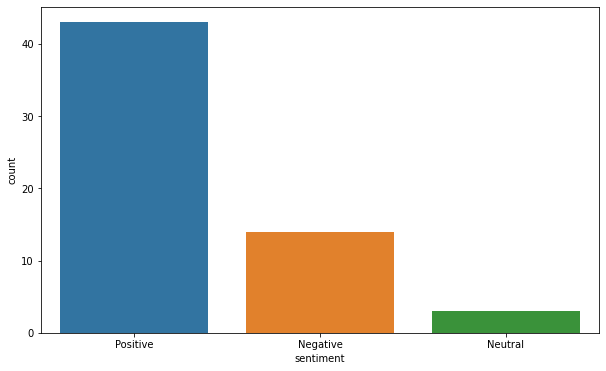

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['sentiment'])

In [55]:
with codecs.open("positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [56]:
with codecs.open("negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [57]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [58]:
df.sentiment.value_counts()


Positive    43
Negative    14
Neutral      3
Name: sentiment, dtype: int64

## Visualization

<AxesSubplot:xlabel='sentiment_score', ylabel='Density'>

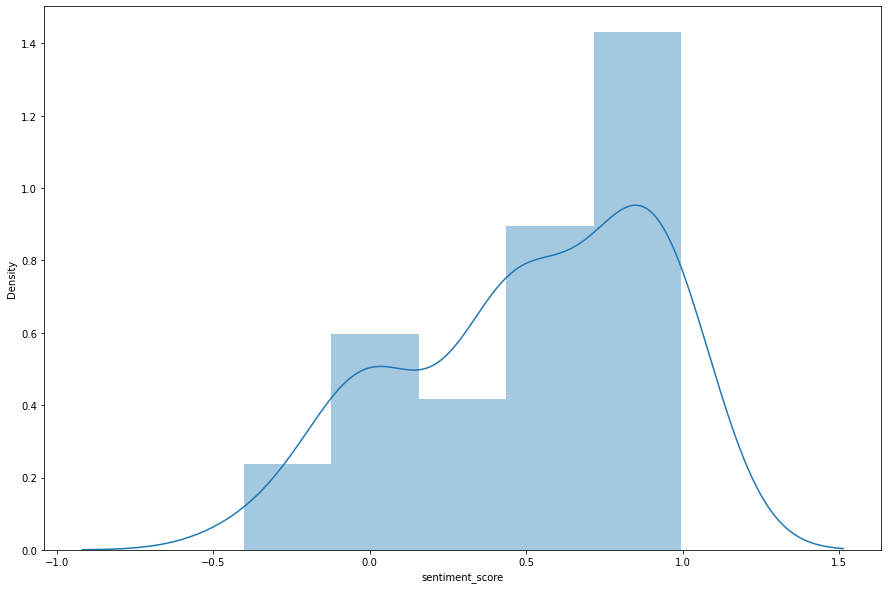

In [59]:
plt.figure(figsize=(15,10))
sns.distplot(df.sentiment_score)